In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch
import torchvision
import torchvision.transforms as transforms

Object `sns` not found.


In [ ]:

trainset = torchvision.datasets.MNIST(root='./data',train=True, download=True, transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [ ]:
classes = ('zero','one','two','three','four','five','six','seven','eight','nine','ten')

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([4, 1, 28, 28])
torch.Size([4])


In [ ]:
img = images[0]
npimg = img.numpy()
print(npimg.shape)

(1, 28, 28)


In [ ]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(28, 28, 1)


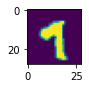

In [ ]:
plt.figure(figsize = (1,1))
plt.imshow(npimg.squeeze(-1))
plt.show()

In [ ]:
print(npimg.shape)

(28, 28, 1)


In [ ]:
def imshow(images):
  images = images.numpy()
  images = np.transpose(images, (1, 2, 0))
  plt.imshow(images)

nine eight four four


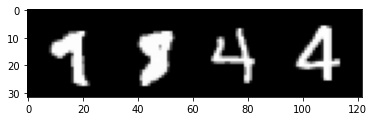

In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
class FirstCNN_v1(nn.Module):
  def __init__(self):
    super(FirstCNN_v1,self).__init__()
    self.cnn = nn.Sequential(
        nn.Conv2d(1, 6, 5),          # (N, 28, 28, 1) -> (N, 6, 24, 24)
        nn.ReLU(),
        nn.AvgPool2d(2, stride = 2), # (N, 6, 24, 24) -> (N, 6, 12, 12)
        nn.Conv2d(6, 16, 5),         # (N, 6, 12, 12) -> (N, 16, 8, 8)
        nn.ReLU(),
        nn.AvgPool2d(2, stride = 2)  # (N, 16, 8, 8) -> (N, 16, 4, 4)
    )
    self.fc = nn.Sequential(
        nn.Linear(256, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )

  def forward(self, x):
    x = self.cnn(x)
    # print(x.shape)
    x = x.view(x.size(0), -1)
    # print(x.shape)
    x = self.fc(x)
    # print(x.shape)
    return x


In [ ]:
net = FirstCNN_v1()

In [ ]:
out = net(images)

In [ ]:
print(out)

tensor([[ 0.0622,  0.0683, -0.0327,  0.0170, -0.0778,  0.0407, -0.0520, -0.0991,
          0.0199, -0.0258],
        [ 0.0582,  0.0750, -0.0314,  0.0228, -0.0765,  0.0430, -0.0502, -0.1070,
          0.0224, -0.0235],
        [ 0.0616,  0.0730, -0.0257,  0.0130, -0.0725,  0.0358, -0.0562, -0.0907,
          0.0157, -0.0201],
        [ 0.0601,  0.0691, -0.0261,  0.0172, -0.0721,  0.0438, -0.0524, -0.0966,
          0.0210, -0.0172]], grad_fn=<AddmmBackward>)


In [ ]:
_, pred = torch.max(out, 1)
print(pred)

tensor([1, 1, 1, 1])


In [ ]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data',train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data',train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [ ]:
net = FirstCNN_v1()
net = net.to(device)

In [ ]:
def evaluation(dataloader):
  correct, total = 0, 0
  for data in dataloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    output = net(images)
    _, pred = torch.max(output ,1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
    return 100 * (correct/total)

In [ ]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
print(net)

NameError: ignored

Training loop

In [ ]:
%%time
max_epochs = 16
loss_arr = []
loss_epoch_arr = []
for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    out = net(inputs)
    opt.zero_grad()
    loss = loss_fn(out, labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())

    if i%10 == 0:
      inputs = inputs.view(inputs.size(0),-1)
      
      sns.distplot()

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, training accuracy : %0.2f, test accuracy : %0.2f' % (epoch, max_epochs, evaluation(trainloader), evaluation(testloader)))

plt.plot(loss_epoch_arr)
plt.show()


NameError: ignored

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0
